# Analysis
___
### The purpose of this is to understand statewise trends, and try to identify the position of different states with regards to the electoral data

___
## Preprocessing
1. Most steps are to process map data
2. Since Jammu and Kashmir and Ladakh were separated in 2019, this data reflects when Ladakh was a part of J&K, hence in order to make relevant maps, Ladakh data assigned data bassed on J&K.

In [61]:
# required imports

import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

fp = r'../assets/map_data/india-polygon.shp'
map_df = gpd.read_file(fp)
df = pd.read_csv("../assets/data/cleaned_data.csv")
df_new = df[df["Year"] >= 2014]
df = df[df["Year"] < 2014]

state_mapping = {
    'Andaman_&_Nicobar_Islands' : "Andaman and Nicobar Islands", 
    'Andhra_Pradesh' : 'Andhra Pradesh', 
    'Arunachal_Pradesh' : 'Arunachal Pradesh' ,
    'Assam' : 'Assam',
    'Bihar' : 'Bihar', 
    'Chandigarh' : 'Chandigarh', 
    'Chhattisgarh' : 'Chhattisgarh',
    'Dadra_&_Nagar_Haveli' : 'Dadra and Nagar Haveli' ,
    'Daman_&_Diu' : 'Daman and Diu',
    'Delhi' :  'Delhi',
    'Goa' :'Goa', 
    'Gujarat' : 'Gujarat',
    'Haryana' : 'Haryana', 
    'Himachal_Pradesh' : 'Himachal Pradesh', 
    'Jammu_&_Kashmir' : 'Jammu and Kashmir', 
    'Jharkhand' : 'Jharkhand',
    'Karnataka' : 'Karnataka', 
    'Kerala' : 'Kerala',
    'Lakshadweep' : 'Lakshadweep', 
    'Madhya_Pradesh' : 'Madhya Pradesh',
    'Maharashtra' : 'Maharashtra', 
    'Manipur' : 'Manipur', 
    'Meghalaya' : 'Meghalaya', 
    'Mizoram' : 'Mizoram',
    'Nagaland' : 'Nagaland',
    'Odisha' : 'Odisha',
    'Puducherry' : 'Puducherry', 
    'Punjab' : 'Punjab', 
    'Rajasthan' : 'Rajasthan', 
    'Sikkim' : 'Sikkim',
    'Tamil_Nadu' : 'Tamil Nadu', 
    'Telangana' : 'Telangana', 
    'Tripura' : 'Tripura', 
    'Uttar_Pradesh' : 'Uttar Pradesh',
    'Uttarakhand':'Uttarakhand', 
    'West_Bengal' : 'West Bengal',
    'Dadra & Nagar Haveli And Daman & Diu' : 'Daman and Diu', 
    'Goa,_Daman_&_Diu' : 'Goa',
    'Mysore' : 'Karnataka' , 
    'Madras' : 'Tamil Nadu'
}
df['State'] = df['State_Name'].map(state_mapping)
df_new['State'] = df_new['State_Name'].map(state_mapping)

___

## Analysis 1: Change in Time with regard to gender ratio
### Here we look at the ratio of gender distribution and caste distribution and check if it changed over time.

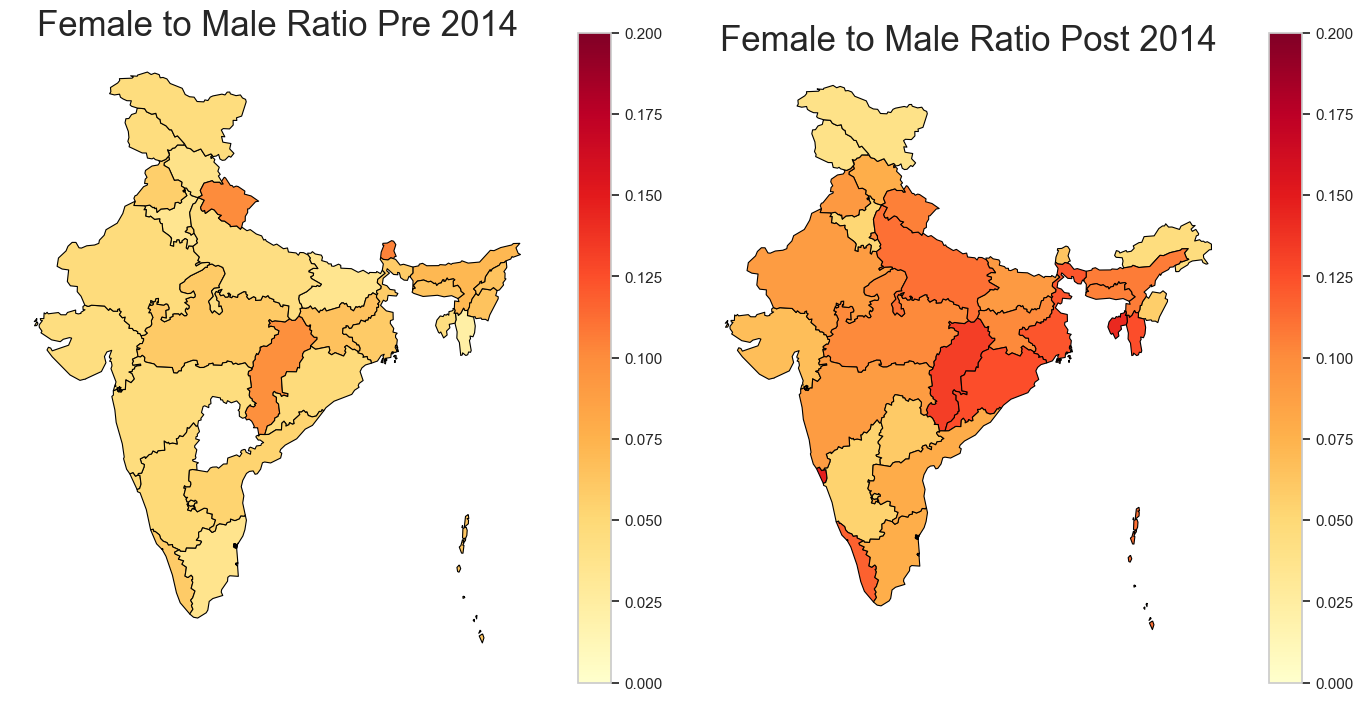

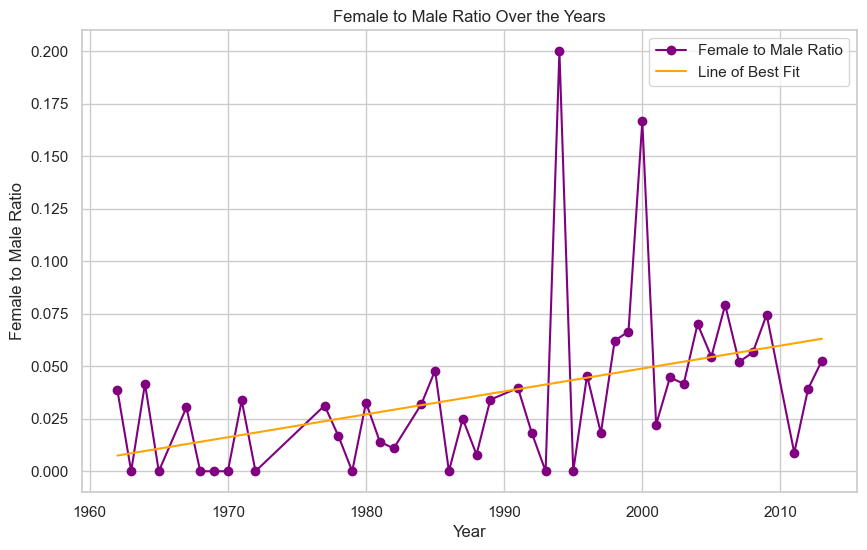

In [62]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def create_choropleth(ax, title, merged_df, vmin, vmax):
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '10'})
    merged_df.plot(column='Female_to_Male_Ratio', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True, vmin=vmin, vmax=vmax)


gender_counts = df.groupby(['State', 'Sex'])['Sex'].count().unstack()
gender_counts['Female_to_Male_Ratio'] = gender_counts['FEMALE'] / gender_counts['MALE']
gender_ratio_df = gender_counts[['Female_to_Male_Ratio']].reset_index()
jammu_kashmir_ratio = gender_ratio_df.loc[gender_ratio_df['State'] == 'Jammu and Kashmir', 'Female_to_Male_Ratio'].values[0]
new_row = {'State': 'Ladakh', 'Female_to_Male_Ratio': jammu_kashmir_ratio}
gender_ratio_df = gender_ratio_df.append(new_row, ignore_index=True)
merged = map_df.set_index('st_nm').join(gender_ratio_df.set_index('State'))


gender_counts_new = df_new.groupby(['State', 'Sex'])['Sex'].count().unstack()
gender_counts_new['Female_to_Male_Ratio'] = gender_counts_new['FEMALE'] / gender_counts_new['MALE']
gender_ratio_df_new = gender_counts_new[['Female_to_Male_Ratio']].reset_index()
jammu_kashmir_ratio_new = gender_ratio_df_new.loc[gender_ratio_df_new['State'] == 'Jammu and Kashmir', 'Female_to_Male_Ratio'].values[0]
new_row_new = {'State': 'Ladakh', 'Female_to_Male_Ratio': jammu_kashmir_ratio_new}
gender_ratio_df_new = gender_ratio_df_new.append(new_row_new, ignore_index=True)
merged_new = map_df.set_index('st_nm').join(gender_ratio_df_new.set_index('State'))

overall_min = min(merged['Female_to_Male_Ratio'].min(), merged_new['Female_to_Male_Ratio'].min())
overall_max = max(merged['Female_to_Male_Ratio'].max(), merged_new['Female_to_Male_Ratio'].max())

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

create_choropleth(axes[0], 'Female to Male Ratio Pre 2014', merged, vmin=0, vmax=0.2)
create_choropleth(axes[1], 'Female to Male Ratio Post 2014', merged_new, vmin=0, vmax=0.2)


plt.tight_layout()
plt.show()

gender_counts = df.groupby(['Year', 'Sex'])['Sex'].count().unstack(fill_value=0)

gender_counts['Female_to_Male_Ratio'] = gender_counts['FEMALE'] / (gender_counts['MALE'] + 1e-10)  # Add a small value to avoid division by zero

plt.figure(figsize=(10, 6))
plt.plot(gender_counts.index, gender_counts['Female_to_Male_Ratio'], marker='o', color='purple', label='Female to Male Ratio')

slope, intercept = np.polyfit(gender_counts.index, gender_counts['Female_to_Male_Ratio'], 1)

plt.plot(gender_counts.index, slope * gender_counts.index + intercept, color='orange', label='Line of Best Fit')

plt.xlabel('Year')
plt.ylabel('Female to Male Ratio')
plt.title('Female to Male Ratio Over the Years')
plt.grid(True)
plt.legend()
plt.show()



### Insights: 
- From the graph on the left (pre 2014), it is noticeable that gender representation for female was extremely low across the country, except Odisha. 
- In post 2014, all the states have seen a significant increase in gender representation, with Odisha still remaining at the top
- The increase in the gender ratio can also be noticed, as seen from the lobf
- Odisha, and a few other eastern states have the most women representation. As of lately, Goa and Kerela have seen a remarkable increase in number of women.

___

## Analysis 2: Electoral Performance in different states (post 2014)
### Here we look at the ratio the turnout percents and margin percents to see if there are some states with higher turnout and more competetive elections

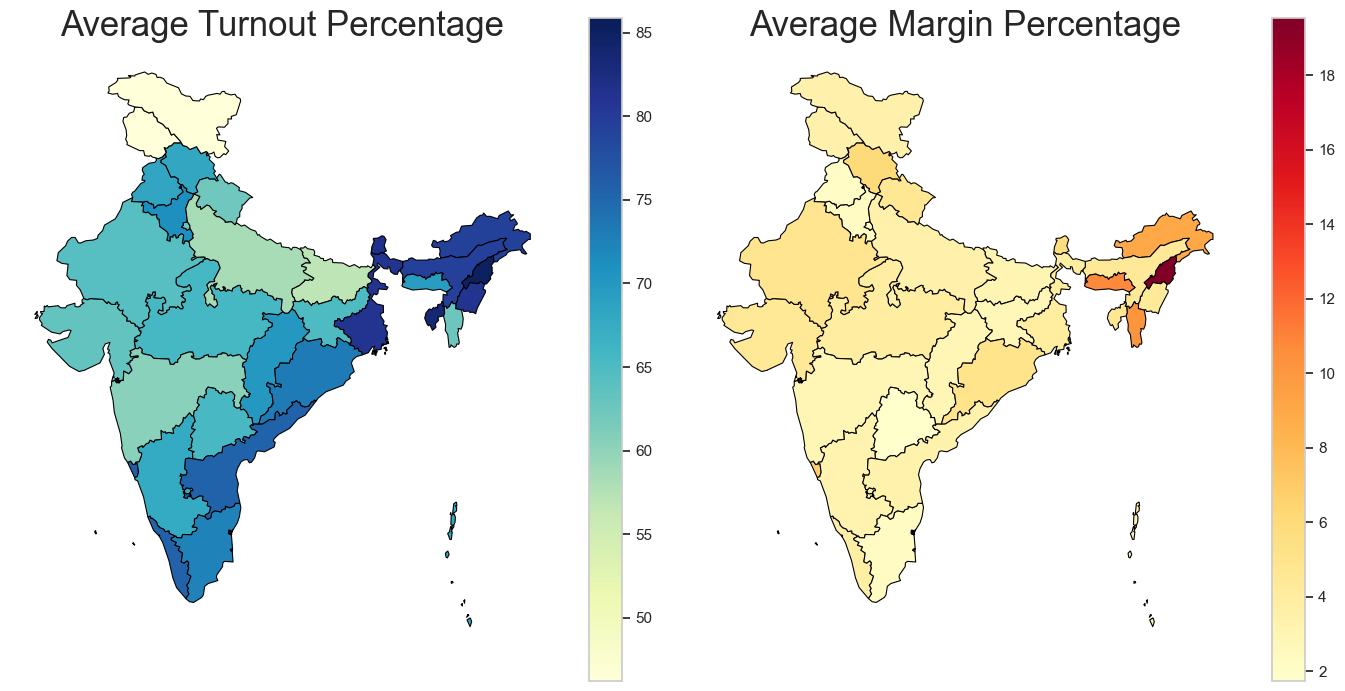

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
state_turnout_margin_df = df_new.groupby('State').agg({
    'Turnout_Percentage': 'mean',
    'Margin_Percentage': 'mean'
}).reset_index()

ladakh_data = {
    'State': 'Ladakh',
    'Turnout_Percentage': state_turnout_margin_df.loc[state_turnout_margin_df['State'] == 'Jammu and Kashmir', 'Turnout_Percentage'].values[0],
    'Margin_Percentage': state_turnout_margin_df.loc[state_turnout_margin_df['State'] == 'Jammu and Kashmir', 'Margin_Percentage'].values[0]
}

state_turnout_margin_df = state_turnout_margin_df.append(ladakh_data, ignore_index=True)

merged = map_df.set_index('st_nm').join(state_turnout_margin_df.set_index('State'))

overall_min_turnout = merged['Turnout_Percentage'].min()
overall_max_turnout = merged['Turnout_Percentage'].max()

overall_min_margin = merged['Margin_Percentage'].min()
overall_max_margin = merged['Margin_Percentage'].max()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

merged.plot(column='Turnout_Percentage', cmap='YlGnBu', linewidth=0.8, ax=axes[0], edgecolor='0', legend=True, vmin=overall_min_turnout, vmax=overall_max_turnout)
axes[0].set_title('Average Turnout Percentage', fontdict={'fontsize': '25', 'fontweight': '10'})
axes[0].axis('off')

merged.plot(column='Margin_Percentage', cmap='YlOrRd', linewidth=0.8, ax=axes[1], edgecolor='0', legend=True, vmin=overall_min_margin, vmax=overall_max_margin)
axes[1].set_title('Average Margin Percentage', fontdict={'fontsize': '25', 'fontweight': '10'})
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Insights: 
- From the graph on the left (average turnout percentage) we see an interesting trend: States on the Right (except kerela and goa) see a much higher turnout in the elections. This suggests that the elections see more active participation. 

- The graph on the left also shows that J&K has some of the lowest turnout.

- The graph on the right again highligts that the east states (7 sisters region) faces higher margin of win, which suggests that elections are won by a higher margin there.
---